In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import voxart

In [16]:
import importlib
importlib.reload(voxart)

<module 'voxart' from '/Users/priley/side_projects/voxart/voxart/__init__.py'>

# XYZ

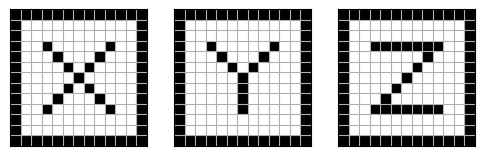

In [3]:
goal_xyz = voxart.Goal.from_image(Image.open("../assets/xyz_13.png"))
goal_xyz.fig()

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

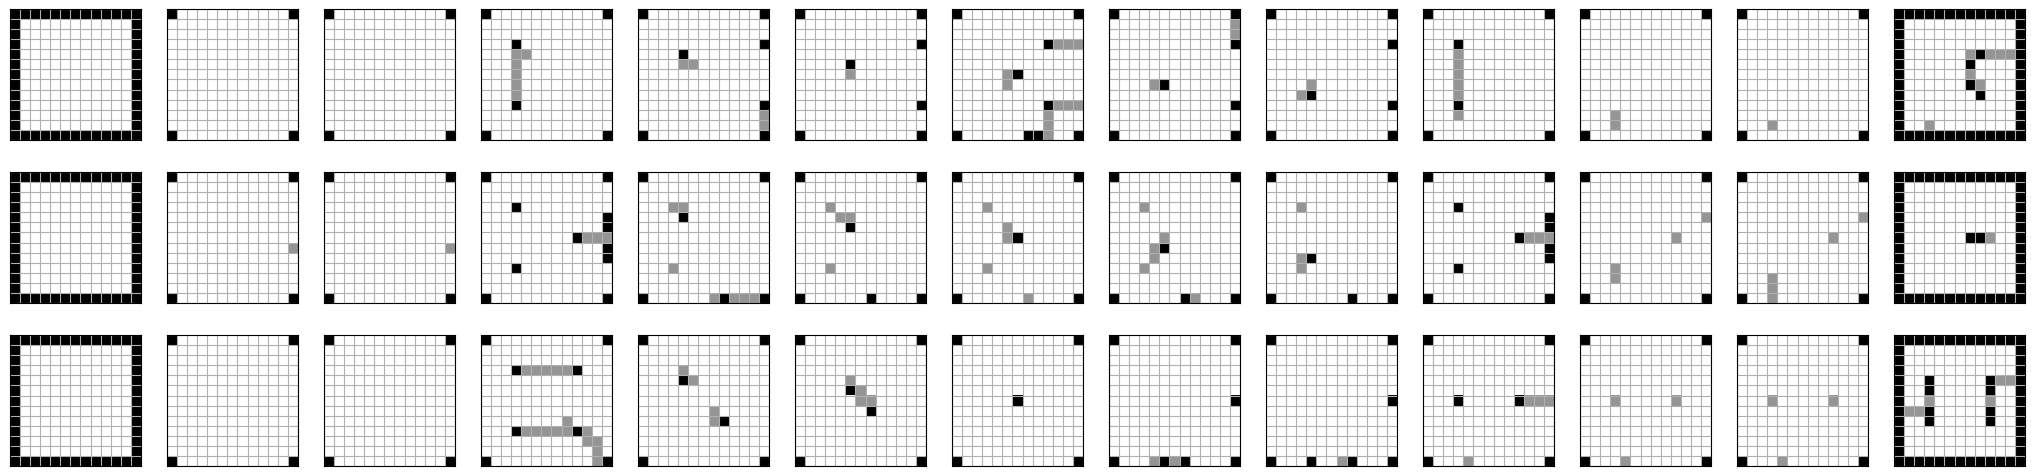

In [4]:
results_filled = voxart.search(goal_xyz, "random_clear_front", num_iterations=50, top_n=1)
_, design_xyz = results_filled.best()[0]
results_conn = voxart.search_connectors(design_xyz, num_iterations=20, top_n=1)
_, design_xyz_conn = results_conn.best()[0]
display(design_xyz_conn.slices_fig())

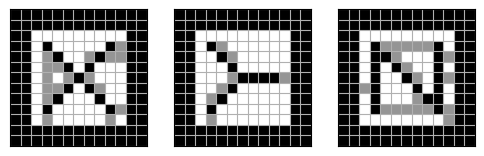

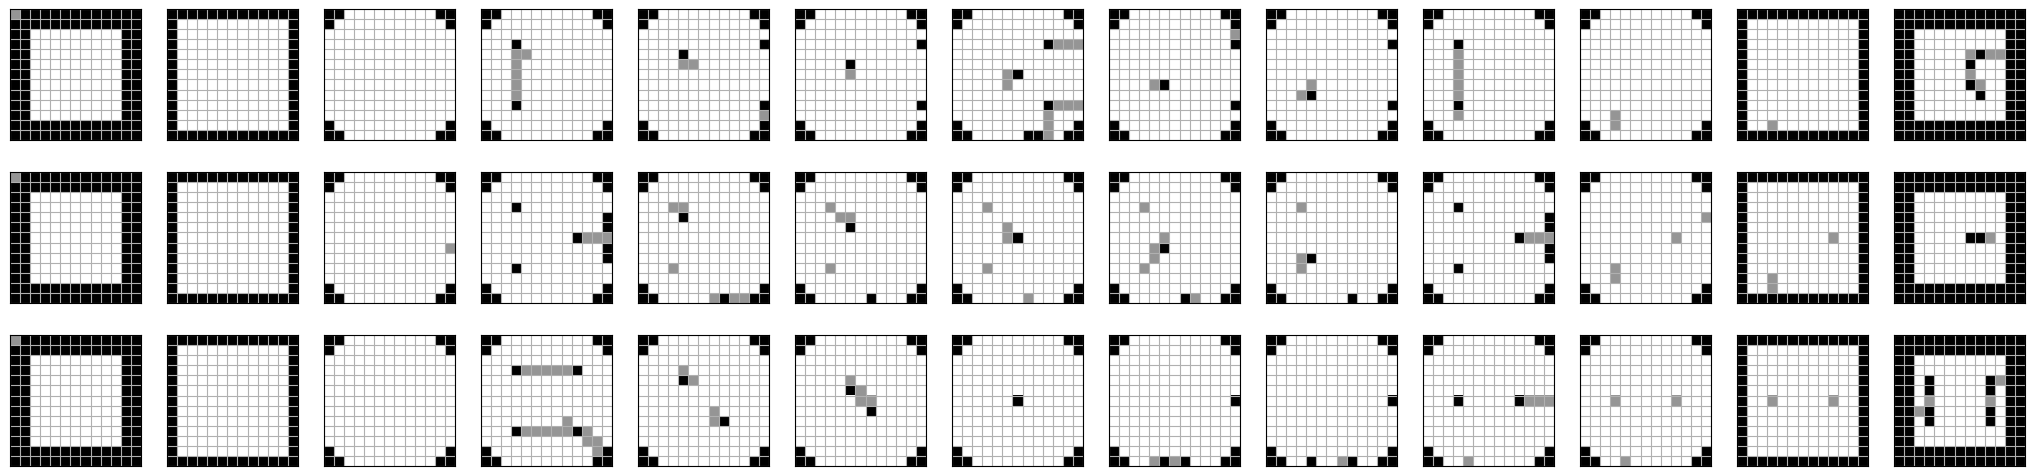

In [5]:
design_xyz_conn.add_frame(1)
design_xyz_conn.voxels[tuple(design_xyz_conn.goal_locations)] = voxart.CONNECTOR
display(design_xyz_conn.projections_fig())
display(design_xyz_conn.slices_fig())

In [6]:
voxart.save_stl(design_xyz_conn, "/Users/priley/tmp/xyz_cube", connector_style="cube", separate_files=True)
voxart.save_stl(design_xyz_conn, "/Users/priley/tmp/xyz_strut", connector_style="strut", separate_files=False)

In [7]:
voxart.connect_faces(design_xyz_conn)
voxart.save_stl(design_xyz_conn, "/Users/priley/tmp/xyz_face_conn", connector_style="strut", separate_files=False)

# PFR

In [14]:
goal_pfr = voxart.Goal.from_image(Image.open("../assets/pfr_13.png"))
goal_pfr.fig()
results_filled = voxart.search(goal_pfr, "random_clear_front", num_iterations=50, top_n=50)
label, design_pfr_conn = results_filled.best()[0]
print(label)

  0%|          | 0/64 [00:00<?, ?it/s]

(0, False)


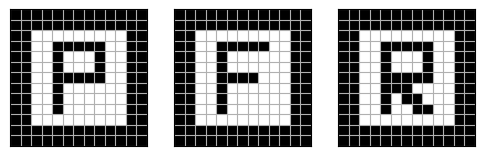

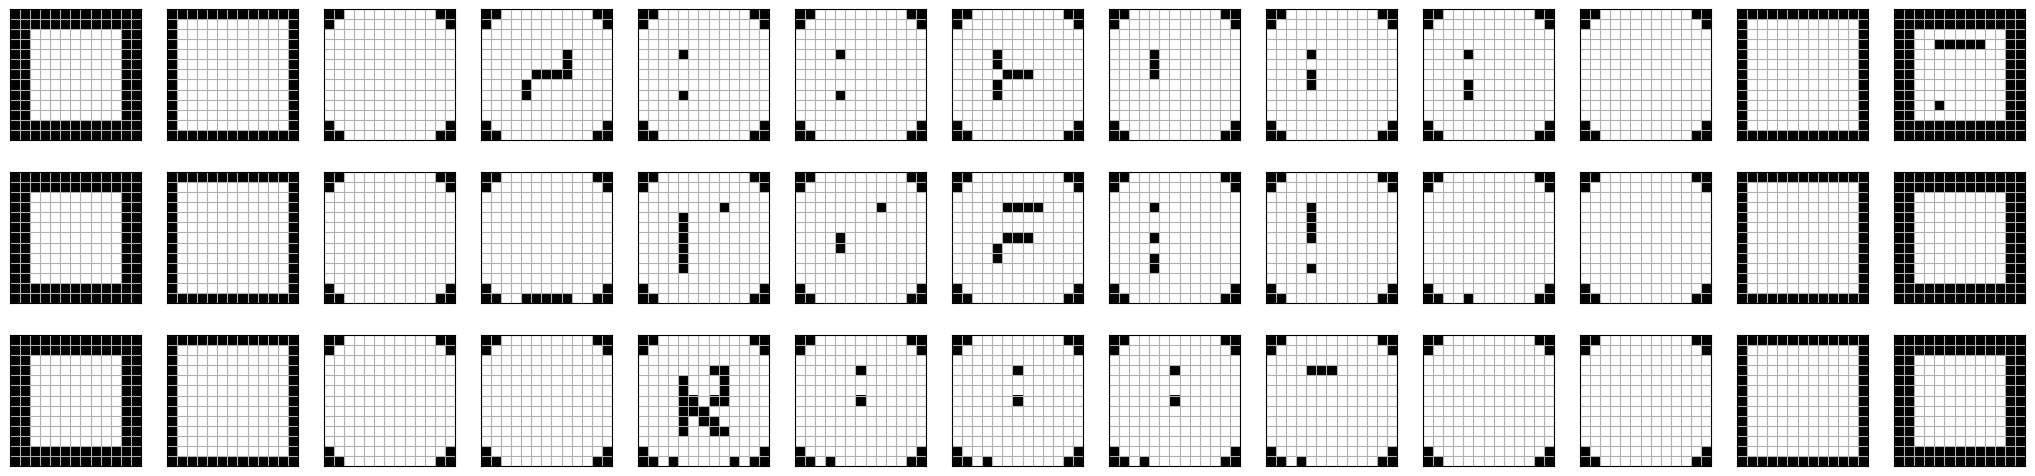

In [15]:
design_pfr_conn.add_frame(1)
display(design_pfr_conn.projections_fig())
display(design_pfr_conn.slices_fig())